# Gradient Descent Implementation from Scratch

This notebook demonstrates the implementation of three different gradient descent optimization techniques:
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-batch Gradient Descent

The implementation includes:
- Type hints for better code readability
- Comprehensive documentation
- Visualization of convergence
- Example usage with synthetic data

Loading Diabetes Dataset...
Dataset: Diabetes
Features shape: (442, 10)
Target shape: (442,)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Training with Batch GD...


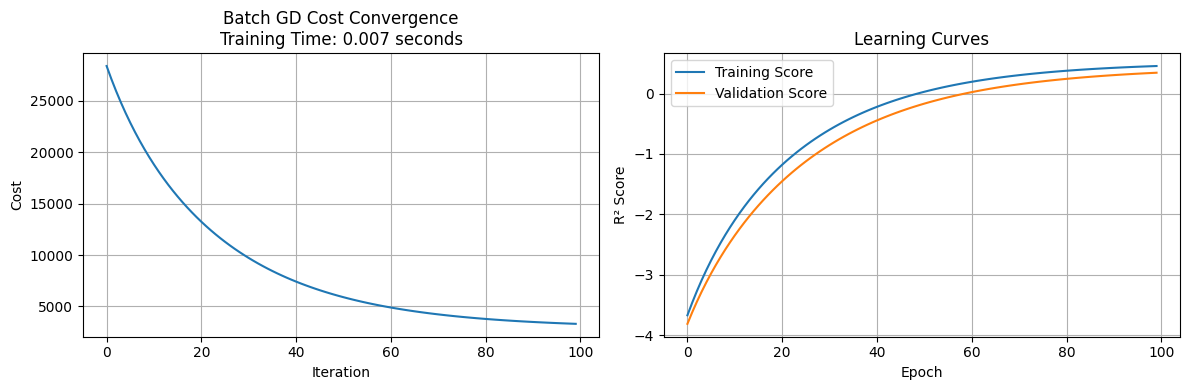


Training with SGD...


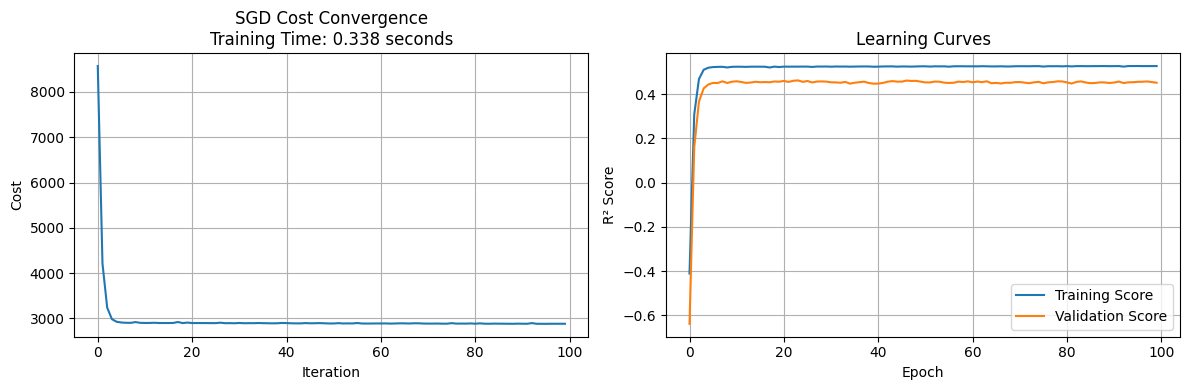


Training with Mini-batch GD...


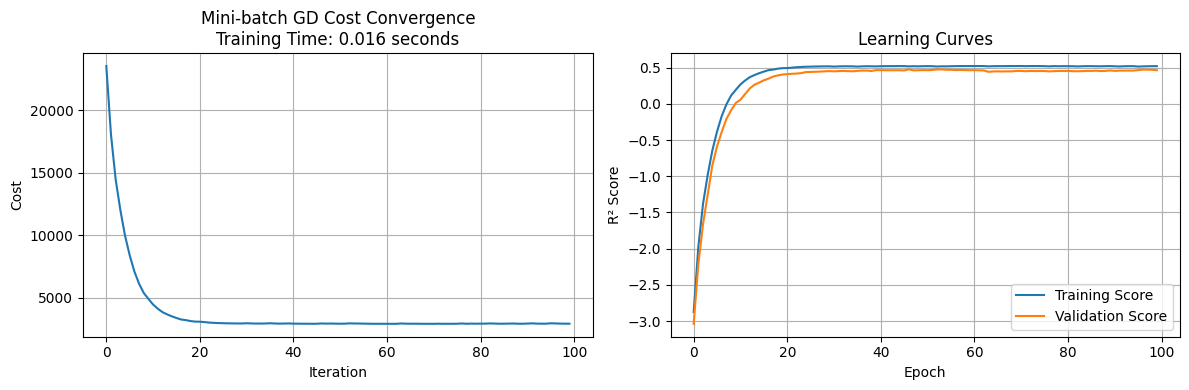


Comparison Results:
--------------------------------------------------

Batch GD:
Training time: 0.007 seconds
Training R² score: 0.4545
Validation R² score: 0.3436
Final cost: 3314.7827

SGD:
Training time: 0.338 seconds
Training R² score: 0.5262
Validation R² score: 0.4510
Final cost: 2879.0669

Mini-batch GD:
Training time: 0.016 seconds
Training R² score: 0.5213
Validation R² score: 0.4651
Final cost: 2908.6925


In [ ]:
import numpy as np
from typing import Tuple, List, Union
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class GradientDescent:
    def __init__(self):
        """Initialize the GradientDescent class for linear regression optimization."""
        self.weights = None
        self.intercept = None
        self.training_time = None
        self.train_scores = []
        self.val_scores = []
        
    def _time_decorator(func):
        def wrapper(self, *args, **kwargs):
            start_time = time()
            result = func(self, *args, **kwargs)
            end_time = time()
            self.training_time = end_time - start_time
            return result
        return wrapper

    def predict(self, data_point: np.ndarray, weight_vector: np.ndarray, intercept: float) -> np.ndarray:
        """
        Predict the output for a given data point using a linear model.

        Parameters:
        - data_point (np.ndarray): N-dimensional input feature vector
        - weight_vector (np.ndarray): Weight vector (coefficients) of the model
        - intercept (float): Intercept (bias term) of the model

        Returns:
        - np.ndarray: Predicted values for the given input data points
        """
        return np.dot(data_point, weight_vector) + intercept

    def mean_squared_loss_function(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """
        Calculate the mean squared error loss.

        Parameters:
        - y_true (np.ndarray): True target values
        - y_pred (np.ndarray): Predicted target values

        Returns:
        - float: Mean squared error value
        """
        return np.mean((y_true - y_pred) ** 2)

    def compute_gradient_descent(self, X_batch: np.ndarray, Y_batch: np.ndarray, 
                               weight_vector: np.ndarray, intercept: float) -> Tuple[np.ndarray, float]:
        """
        Perform one step of gradient descent to compute gradients for weights and intercept.

        Parameters:
        - X_batch (np.ndarray): Batch of input features (each row is a data point)
        - Y_batch (np.ndarray): Actual target values corresponding to the batch
        - weight_vector (np.ndarray): Current weight vector
        - intercept (float): Current intercept (bias term)

        Returns:
        - Tuple[np.ndarray, float]: Gradients for weight vector and intercept
        """
        N = len(X_batch)
        y_pred = self.predict(X_batch, weight_vector, intercept)
        error = y_pred - Y_batch

        d_weight = (2/N) * X_batch.T.dot(error)
        d_intercept = (2/N) * np.sum(error)

        return d_weight, d_intercept

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate the R² score for the model.

        Parameters:
        - X (np.ndarray): Input features
        - y (np.ndarray): True target values

        Returns:
        - float: R² score
        """
        y_pred = self.predict(X, self.weights, self.intercept)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    @_time_decorator
    def batch_gradient_descent(self, X: np.ndarray, Y: np.ndarray, X_val: np.ndarray = None, y_val: np.ndarray = None,
                             learning_rate: float = 0.001, epochs: int = 100) -> Tuple[np.ndarray, float, List[float], List[np.ndarray], List[float]]:
        """
        Perform batch gradient descent optimization.

        Parameters:
        -----------
        X : np.ndarray
            Input features matrix of shape (n_samples, n_features)
        Y : np.ndarray
            Target values of shape (n_samples,)
        X_val : np.ndarray, optional
            Validation features matrix
        y_val : np.ndarray, optional
            Validation target values
        learning_rate : float, optional (default=0.001)
            Step size for parameter updates
        epochs : int, optional (default=100)
            Number of complete passes through the training dataset

        Returns:
        --------
        Tuple containing:
            - Final weight vector
            - Final intercept
            - History of cost values
            - History of weight vectors
            - History of intercept values
        """
        d = X.shape[1]
        w = np.zeros(d)
        b = 0.0

        cost_history = []
        w_history = []
        intercept_history = []

        self.train_scores = []
        self.val_scores = []

        for epoch in range(epochs):
            d_weight, d_intercept = self.compute_gradient_descent(X, Y, w, b)
            w -= learning_rate * d_weight
            b -= learning_rate * d_intercept

            # Store current weights for tracking
            self.weights = w
            self.intercept = b

            # Track training and validation scores
            self.train_scores.append(self.score(X, Y))
            if X_val is not None and y_val is not None:
                self.val_scores.append(self.score(X_val, y_val))

            cost = self.mean_squared_loss_function(Y, self.predict(X, w, b))
            cost_history.append(cost)
            w_history.append(w.copy())
            intercept_history.append(b)

        return w, b, cost_history, w_history, intercept_history

    @_time_decorator
    def stochastic_gradient_descent(self, X: np.ndarray, Y: np.ndarray, X_val: np.ndarray = None, y_val: np.ndarray = None,
                                  learning_rate: float = 0.001, epochs: int = 100) -> Tuple[np.ndarray, float, List[float], List[np.ndarray], List[float]]:
        """
        Perform stochastic gradient descent optimization.
        
        Parameters:
        - X (np.ndarray): Input features matrix
        - Y (np.ndarray): Target values
        - X_val (np.ndarray): Validation features matrix
        - y_val (np.ndarray): Validation target values
        - learning_rate (float): Step size for parameter updates
        - epochs (int): Number of training iterations
        
        Returns:
        - Tuple containing:
            - Final weight vector
            - Final intercept
            - History of cost values
            - History of weight vectors
            - History of intercept values
        """
        d = X.shape[1]
        w = np.zeros(d)
        b = 0.0

        cost_history = []
        w_history = []
        intercept_history = []
        N = len(X)

        self.train_scores = []
        self.val_scores = []

        for epoch in range(epochs):
            random_index = np.random.permutation(N)
            X_shuffled = X[random_index]
            Y_shuffled = Y[random_index]

            for i in range(N):
                xi = X_shuffled[i:i+1]
                yi = Y_shuffled[i:i+1]
                
                d_weight, d_intercept = self.compute_gradient_descent(xi, yi, w, b)
                w -= learning_rate * d_weight
                b -= learning_rate * d_intercept

            # Store current weights for tracking
            self.weights = w
            self.intercept = b

            # Track training and validation scores
            self.train_scores.append(self.score(X, Y))
            if X_val is not None and y_val is not None:
                self.val_scores.append(self.score(X_val, y_val))

            cost = self.mean_squared_loss_function(Y, self.predict(X, w, b))
            cost_history.append(cost)
            w_history.append(w.copy())
            intercept_history.append(b)

        return w, b, cost_history, w_history, intercept_history

    @_time_decorator
    def mini_batch_gradient(self, X: np.ndarray, Y: np.ndarray, X_val: np.ndarray = None, y_val: np.ndarray = None,
                          learning_rate: float = 0.001, batch_size: int = 32, epochs: int = 100) -> Tuple[np.ndarray, float, List[float], List[np.ndarray], List[float]]:
        """
        Perform mini-batch gradient descent optimization.
        
        Parameters:
        - X (np.ndarray): Input features matrix
        - Y (np.ndarray): Target values
        - X_val (np.ndarray): Validation features matrix
        - y_val (np.ndarray): Validation target values
        - learning_rate (float): Step size for parameter updates
        - batch_size (int): Size of mini-batches
        - epochs (int): Number of training iterations
        
        Returns:
        - Tuple containing:
            - Final weight vector
            - Final intercept
            - History of cost values
            - History of weight vectors
            - History of intercept values
        """
        d = X.shape[1]
        w = np.zeros(d)
        b = 0.0

        cost_history = []
        w_history = []
        intercept_history = []

        self.train_scores = []
        self.val_scores = []

        N = len(X)
        for epoch in range(epochs):
            random_index = np.random.permutation(N)
            X_shuffled = X[random_index]
            Y_shuffled = Y[random_index]

            for start in range(0, N, batch_size):
                end = min(start + batch_size, N)
                X_batch = X_shuffled[start:end]
                Y_batch = Y_shuffled[start:end]

                d_weight, d_intercept = self.compute_gradient_descent(X_batch, Y_batch, w, b)
                w -= learning_rate * d_weight
                b -= learning_rate * d_intercept

            # Store current weights for tracking
            self.weights = w
            self.intercept = b

            # Track training and validation scores
            self.train_scores.append(self.score(X, Y))
            if X_val is not None and y_val is not None:
                self.val_scores.append(self.score(X_val, y_val))

            cost = self.mean_squared_loss_function(Y, self.predict(X, w, b))
            cost_history.append(cost)
            w_history.append(w.copy())
            intercept_history.append(b)

        return w, b, cost_history, w_history, intercept_history

    def plot_convergence(self, cost_history: List[float], method_name: str = "") -> None:
        """
        Plot the convergence of the cost function over iterations.

        Parameters:
        -----------
        cost_history : List[float]
            List containing the cost values at each iteration
        method_name : str, optional
            Name of the gradient descent method used

        Returns:
        --------
        None
            Displays plots of the cost function convergence and learning curves
        """
        plt.figure(figsize=(12, 4))
        
        # Plot 1: Cost convergence
        plt.subplot(1, 2, 1)
        plt.plot(range(len(cost_history)), cost_history)
        plt.title(f'{method_name} Cost Convergence\nTraining Time: {self.training_time:.3f} seconds')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.grid(True)
        
        # Plot 2: Training vs Validation scores
        if self.train_scores and self.val_scores:
            plt.subplot(1, 2, 2)
            plt.plot(self.train_scores, label='Training Score')
            plt.plot(self.val_scores, label='Validation Score')
            plt.title('Learning Curves')
            plt.xlabel('Epoch')
            plt.ylabel('R² Score')
            plt.legend()
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

def compare_methods(X, y, test_size=0.2, random_state=42):
    """
    Compare different gradient descent optimization methods.
    
    Parameters:
    -----------
    X : np.ndarray
        Input features matrix
    y : np.ndarray
        Target values
    test_size : float, optional (default=0.2)
        Proportion of dataset to include in the validation split
    random_state : int, optional (default=42)
        Random state for reproducibility
        
    Returns:
    --------
    dict
        Dictionary containing performance metrics for each method
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)
    
    methods = {
        'Batch GD': {'lr': 0.01, 'epochs': 100},
        'SGD': {'lr': 0.001, 'epochs': 100},
        'Mini-batch GD': {'lr': 0.005, 'batch_size': 32, 'epochs': 100}
    }
    
    results = {}
    for method_name, params in methods.items():
        gd = GradientDescent()
        print(f"\nTraining with {method_name}...")
        
        if method_name == 'Batch GD':
            w, b, cost_history, _, _ = gd.batch_gradient_descent(X_train, y_train, X_val, y_val, 
                                                               learning_rate=params['lr'], 
                                                               epochs=params['epochs'])
        elif method_name == 'SGD':
            w, b, cost_history, _, _ = gd.stochastic_gradient_descent(X_train, y_train, X_val, y_val,
                                                                     learning_rate=params['lr'], 
                                                                     epochs=params['epochs'])
        else:
            w, b, cost_history, _, _ = gd.mini_batch_gradient(X_train, y_train, X_val, y_val,
                                                             learning_rate=params['lr'],
                                                             batch_size=params['batch_size'],
                                                             epochs=params['epochs'])
        
        train_score = gd.score(X_train, y_train)
        
        val_score = gd.score(X_val, y_val)
        
        results[method_name] = {
            'training_time': gd.training_time,
            'train_score': train_score,
            'val_score': val_score,
            'final_cost': cost_history[-1]
        }
        
        gd.plot_convergence(cost_history, method_name)
        
    return results

# Example usage
if __name__ == "__main__":
    print("Loading Diabetes Dataset...")
    diabetes = load_diabetes()
    X, y = diabetes.data, diabetes.target

    print("Dataset: Diabetes")
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print("\nFeature names:", diabetes.feature_names)

    # Compare different optimization methods
    results = compare_methods(X, y)

    # Print results
    print("\nComparison Results:")
    print("-" * 50)
    for method, metrics in results.items():
        print(f"\n{method}:")
        print(f"Training time: {metrics['training_time']:.3f} seconds")
        print(f"Training R² score: {metrics['train_score']:.4f}")
        print(f"Validation R² score: {metrics['val_score']:.4f}")
        print(f"Final cost: {metrics['final_cost']:.4f}")